In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.precision',3)

In [4]:
tel = pd.read_csv('telecom_churn.csv')

## Data Overview

In [5]:
tel.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.7,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.7,1,False


In [6]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

## Data Manipulation

In [7]:
tel['Churn'] = tel['Churn'].astype('int64')

In [8]:
d = {'No':0, 'Yes':1}

In [9]:
tel['International plan'] = tel['International plan'].map(d)

In [10]:
tel['Voice mail plan'] = tel['Voice mail plan'].map(d)

In [11]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   int64  
 4   Voice mail plan         3333 non-null   int64  
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

Churn rate(mean) is 14.5%, which means loyalty percentage is 85.5% from simple observation

In [12]:
tel.describe()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,101.065,437.182,0.097,0.277,8.099,179.775,100.436,30.562,200.980,100.114,17.084,200.872,100.108,9.039,10.237,4.479,2.765,1.563,0.145
std,39.822,42.371,0.296,0.447,13.688,54.467,20.069,9.259,50.714,19.923,4.311,50.574,19.569,2.276,2.792,2.461,0.754,1.315,0.352
min,1.000,408.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,23.200,33.000,1.040,0.000,0.000,0.000,0.000,0.000
25%,74.000,408.000,0.000,0.000,0.000,143.700,87.000,24.430,166.600,87.000,14.160,167.000,87.000,7.520,8.500,3.000,2.300,1.000,0.000
50%,101.000,415.000,0.000,0.000,0.000,179.400,101.000,30.500,201.400,100.000,17.120,201.200,100.000,9.050,10.300,4.000,2.780,1.000,0.000
75%,127.000,510.000,0.000,1.000,20.000,216.400,114.000,36.790,235.300,114.000,20.000,235.300,113.000,10.590,12.100,6.000,3.270,2.000,0.000
max,243.000,510.000,1.000,1.000,51.000,350.800,165.000,59.640,363.700,170.000,30.910,395.000,175.000,17.770,20.000,20.000,5.400,9.000,1.000


Add some columns

In [13]:
tel['Total domestic min'] = tel['Total day minutes']+tel['Total eve minutes']+tel['Total night minutes']

In [14]:
tel['Total domestic calls'] = tel['Total day calls']+tel['Total eve calls']+tel['Total night calls']

In [15]:
tel['Total domestic charge'] = tel['Total day charge']+tel['Total eve charge']+tel['Total night charge']

In [16]:
tel.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total domestic min,Total domestic calls,Total domestic charge
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,...,91,11.01,10.0,3,2.7,1,0,707.2,300,72.86
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,...,103,11.45,13.7,3,3.7,1,0,611.5,329,55.54


Extracting the columns we're going to use :

In [17]:
tel1 = tel[['State','Area code',
     'International plan',
     'Voice mail plan',
     'Number vmail messages',
     'Total intl minutes',
     'Total intl calls',
     'Total intl charge',
     'Total domestic min',
     'Total domestic calls',
     'Total domestic charge',
     'Customer service calls',
     'Churn']]

In [18]:
tel1

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Total domestic min,Total domestic calls,Total domestic charge,Customer service calls,Churn
0,KS,415,0,1,25,10.0,3,2.70,707.2,300,72.86,1,0
1,OH,415,0,1,26,13.7,3,3.70,611.5,329,55.54,1,0
2,NJ,415,0,0,0,12.2,5,3.29,527.2,328,59.00,0,0
3,OH,408,1,0,0,6.6,7,1.78,558.2,248,65.02,2,0
4,OK,415,1,0,0,10.1,3,2.73,501.9,356,49.36,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,415,0,1,36,9.9,6,2.67,650.8,286,57.43,2,0
3329,WV,415,0,0,0,9.6,4,2.59,575.8,235,60.94,3,0
3330,RI,510,0,0,0,14.1,6,3.81,661.5,258,63.93,2,0
3331,CT,510,1,0,0,5.0,10,1.35,512.6,326,56.18,2,0


In [19]:
tel1.describe()

,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Total domestic min,Total domestic calls,Total domestic charge,Customer service calls,Churn
count,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000,3333.000
mean,437.182,0.097,0.277,8.099,10.237,4.479,2.765,581.627,300.658,56.685,1.563,0.145
std,42.371,0.296,0.447,13.688,2.792,2.461,0.754,89.969,34.328,10.488,1.315,0.352
min,408.000,0.000,0.000,0.000,0.000,0.000,0.000,275.200,188.000,19.980,0.000,0.000
25%,408.000,0.000,0.000,0.000,8.500,3.000,2.300,521.000,278.000,49.590,1.000,0.000
50%,415.000,0.000,0.000,0.000,10.300,4.000,2.780,583.100,301.000,56.630,1.000,0.000
75%,510.000,0.000,1.000,20.000,12.100,6.000,3.270,642.500,324.000,63.650,2.000,0.000
max,510.000,1.000,1.000,51.000,20.000,20.000,5.400,876.900,410.000,92.560,9.000,1.000


## Exploratory Data Analysis (EDA)

In [20]:
import seaborn as sns

In [21]:
tel1.head(2)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Total domestic min,Total domestic calls,Total domestic charge,Customer service calls,Churn
0,KS,415,0,1,25,10.0,3,2.7,707.2,300,72.86,1,0
1,OH,415,0,1,26,13.7,3,3.7,611.5,329,55.54,1,0


Let see the distribution of churn rate with/without international plan

In [22]:
pd.crosstab(tel1['Churn'],tel['International plan'])

International plan,0,1
Churn,,
0,2664,186
1,346,137


<AxesSubplot:xlabel='International plan', ylabel='count'>

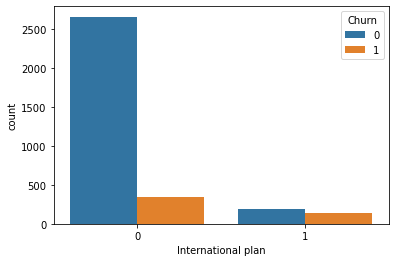

In [23]:
sns.countplot(x='International plan',hue='Churn', data=tel1)

In [24]:
no_intl = tel1.groupby(by='International plan')['Churn'].mean().iloc[0]
with_intl = tel1.groupby(by='International plan')['Churn'].mean().iloc[1]
print('Churn rate without international plan: ', f"{no_intl:.2%}")
print('Churn rate with international plan: ', f"{with_intl:.2%}")
print('Large difference!')

Churn rate without international plan:  11.50%
Churn rate with international plan:  42.41%
Large difference!


Next, we're going to look at the churn rate with/without voice mail plan

In [25]:
pd.crosstab(tel1['Churn'], tel['Voice mail plan'])

Voice mail plan,0,1
Churn,,
0,2008,842
1,403,80


In [26]:
pd.crosstab(tel1['Churn'],tel1['Voice mail plan'],normalize = True)

Voice mail plan,0,1
Churn,,
0,0.602,0.253
1,0.121,0.024


<AxesSubplot:xlabel='Voice mail plan', ylabel='count'>

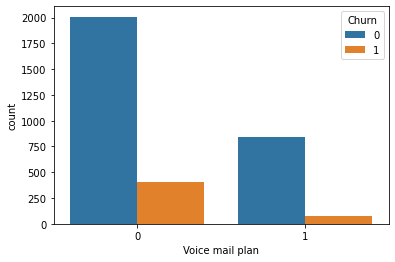

In [27]:
sns.countplot(x='Voice mail plan', hue='Churn',data=tel1)

In [28]:
no_vm = tel1.groupby(by='Voice mail plan')['Churn'].mean().iloc[0]
with_vm = tel1.groupby(by='Voice mail plan')['Churn'].mean().iloc[1]
print('Churn rate without voice mail plan: ', f"{no_vm:.2%}")
print('Churn rate with voice mail plan: ', f"{with_vm:.2%}")

Churn rate without voice mail plan:  16.72%
Churn rate with voice mail plan:  8.68%


How does the churn rate relate to customer service call?

<AxesSubplot:xlabel='Customer service calls', ylabel='count'>

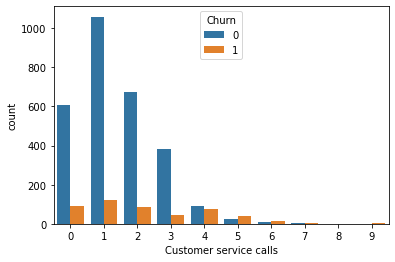

In [29]:
sns.countplot(x='Customer service calls', hue='Churn', data=tel1)

In [30]:
x = tel1.groupby(by='Customer service calls')['Churn'].mean()

for i in range(0,len(x)):
    if i<=1:
        print('Churn rate for',i,'customer service call: ',f"{x.iloc[i]:.2%}")
    else:
        print('Churn rate for',i,'customer service calls: ',f"{x.iloc[i]:.2%}")

Churn rate for 0 customer service call:  13.20%
Churn rate for 1 customer service call:  10.33%
Churn rate for 2 customer service calls:  11.46%
Churn rate for 3 customer service calls:  10.26%
Churn rate for 4 customer service calls:  45.78%
Churn rate for 5 customer service calls:  60.61%
Churn rate for 6 customer service calls:  63.64%
Churn rate for 7 customer service calls:  55.56%
Churn rate for 8 customer service calls:  50.00%
Churn rate for 9 customer service calls:  100.00%


We can clearly see that starting from 4th customer service call, the churn rate largely increases.

Let's look at the data with more than 3 customer calls

In [143]:
tel1['more_call']=(tel1['Customer service calls']>3).astype('int')

<ipython-input-143-8ac9f837b6bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel1['more_call']=(tel1['Customer service calls']>3).astype('int')


In [147]:
tel1.head(2)

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total intl minutes,Total intl calls,Total intl charge,Total domestic min,Total domestic calls,Total domestic charge,Customer service calls,Churn,more_call
0,KS,415,0,1,25,10.0,3,2.7,707.2,300,72.86,1,0,0
1,OH,415,0,1,26,13.7,3,3.7,611.5,329,55.54,1,0,0


<AxesSubplot:xlabel='more_call', ylabel='count'>

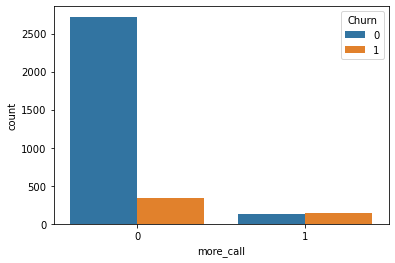

In [149]:
sns.countplot(x='more_call',hue='Churn',data=tel1)

In [154]:
less = tel1.groupby(by='more_call')['Churn'].mean()[0]
more = tel1.groupby(by='more_call')['Churn'].mean()[1]

print('Churn rate with call < 4 times: ',f"{less:.2%}")
print('Churn rate with call >= 4 times: ',f"{more:.2%}")

Churn rate with call < 4 times:  11.25%
Churn rate with call >= 4 times:  51.69%


In [167]:
pd.crosstab(tel1['more_call']&tel1['International plan'],tel1['Churn'])

Churn,0,1
row_0,,
0,2841,464
1,9,19


In [168]:
pd.crosstab(tel1['more_call']&tel1['International plan'],tel1['Churn'],normalize=True)

Churn,0,1
row_0,,
0,0.852,0.139
1,0.003,0.006


Prediction: 

With customer service calls more than 3 calls and added international plan, we're guessing the churn rate to be 85.8%